In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from Networkmodel import NetworkModel_org, HopField

In [2]:
class NetworkModel(NetworkModel_org):
    def task_condition(self):
        self.condition = np.array([1,2,3,4,5,6]) 
        self.actdict = {1: [2], 2: [4,5], 3: [4], 4: [1], 5: [1], 6: [2]}
        self.initial = 1
        self.terminal = [4,5]
        self.prob = 0.5
        self.stmdict = {1: [1, 1.6], 2: [2.1,2.2], 3: [3], 4:[4], 5:[5], 6: [6]}
        self.cortex_calc = [1,6]
        self.stmindex = {1:0, 2:int(np.random.rand() < self.prob), 3:0, 4:0, 5:0, 6:0}
        self.swblock = 30
        self.HFregister = dict()
        self.condact = {i:[] for i in self.condition}
        self.escape = [1.6]
        for key,val in self.stmdict.items():
            for s in val:
                tmp = np.zeros(self.nstm)
                tmp[np.sort(np.random.choice(len(tmp), int(len(tmp)/2), replace = False))] = 1                     
                self.HFregister[s] = tmp
        self.HFregister[1.6] = (self.HFregister[1] + self.HFregister[6])/2
            
    def check_rwd(self, result, count):
        if not result[-1]["cond"] in self.terminal:
            return 0
        swmode = np.mod(np.floor(count/self.swblock),2)
        tmp1 = sum([result[i]["infcond"] for i in range(len(result))], [])
        tmp2 = [result[i]["cond"] for i in range(len(result))]
        initial = 1 if np.mod(np.floor((count+1)/self.swblock),2) == 0 else 6
        if count < 120:
            if initial != self.initial:
                self.actdict = {1: [2], 2: [4,5], 3: [4], 4: [initial], 5: [initial], 6: [2]}
                self.initial = None
            if count == 119:
                self.stmindex[1] = 1
            if self.stmindex[2] == 0:
                self.stmindex[2] = 0 if np.random.rand() < self.prob else 1
                return int(4 in tmp2) if swmode == 0 else int(5 in tmp2)
            else:
                self.stmindex[2] = 0 if np.random.rand() < self.prob else 1
                return int(5 in tmp2) if swmode == 0 else int(4 in tmp2)
        else:
            self.initial = None
            x = np.mod(count, 3)
            if x == 0:
                self.stmindex[1] = 0
            elif x == 1:
                self.actdict = {1: [2], 2: [4,5], 3: [4], 4: [6], 5: [6], 6: [2]}
            else:
                self.stmindex[1] = 1
                self.actdict = {1: [2], 2: [4,5], 3: [4], 4: [1], 5: [1], 6: [2]}
            self.stmindex[2] = 0 if np.random.rand() < self.prob else 1
            return np.nan

In [3]:
allresult = dict()
x = 0

In [4]:
hp = NetworkModel(200,1000,300,1200,8)
result = []
HCprev = []
cond = None
for i in range(150):
    result_,HCprev,cond = hp.process(i, HCprev, cond, verbose = True)
    result.append(result_)
allresult[x] = result
x += 1 

trial 0 stmindex 0 HCprev []
HCprev []
think 0-0 [259]
plan 1 [] 2
init 1 2
memo 1 0
HF2HC [234] 1-0
HC2HF [234] 1-0
pkup [234] 1-0
choose [1. 2.] [234  36]
stmremap [-1] [36] []
HCprev [[36]]
think 0-0 [27]
plan 2 [] 5
init 2 5
memo 2 0
HF2HC [109] 2.1-0
HC2HF [109] 2.1-0
pkup [109] 2.1-0
HC2HF [36] [2.1 0. ]
remove [1.  2.1 5. ] [234  36 109 212]
HF2HC [109] 2.1-0
HC2HF [109] 2.1-0
HCprev [array([212], dtype=int64)]
think 0-0 [23]
plan 5 [] 1
init 5 1
memo 5 0
HF2HC [284] 5-0
HC2HF [284] 5-0
pkup [284] 5-0
choose [5. 1.] [284  95]
HC2HF [212] 5-0
HF2HC [284] 5-0
HC2HF [284] 5-0
check trans [5.0] {}
['c:1', 'n:5.0', 'e:0.0', 'i:[1.0, 2.1]', 'p:[1.0, 2.0]', 'H:[234  36 109 212]', 'a:1-0', 'r:0']
['c:5', 'n:1', 'e:0.0', 'i:[5.0, 1.0]', 'p:[5.0, 1.0]', 'H:[212 284  95]', 'a:5-0', 'r:0', "p:['1-0', '2.1-0', '5-0']"]

trial 1 stmindex 1 HCprev 95
HCprev [array([95], dtype=int64)]
external stm 1
think 1-0 [234]
external stm 1
think 1-0 [234]
external stm 1
think 1-0 [234]
external stm 1
thi

check trans [1.0, 2.2, 5.0, 1.0] {}
['c:1', 'n:5.0', 'e:0.27749999999999997', 'i:[1.0, 2.2, 5.0]', 'p:[1.0, 2.1, 4.0]', 'H:[185 234  36  24 296  76   5]', 'a:1-0', 'r:0']
['c:5', 'n:1', 'e:0.27749999999999997', 'i:[1.0, 2.2, 5.0]', 'p:[1.0, 2.1, 4.0]', 'H:[185 234  36  24 296  76   5]', 'a:5-1', 'r:1', "p:['1-0', '2.1-0', '5-0', '2.2-1', '4-0', '5-1', '4-1']"]

trial 12 stmindex 0 HCprev 5
HCprev [array([5], dtype=int64)]
think 1-0 [234]
choose [1.  2.2 5. ] [234  36  24 296  76   5]
stmremap [24] [36] [ 24 109]
HCprev [[109]]
think 2.1-0 [109]
HC2HF [109] [2.1 0. ]
remove [1.  2.1 4. ] [234  36 109 249 274 185]
HF2HC [109] 2.1-0
HC2HF [109] 2.1-0
check trans [1.0, 2.2, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.38587499999999997', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.2, 5.0]', 'H:[  5 234  36 109 249 274 185]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.38587499999999997', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.2, 5.0]', 'H:[  5 234  36 109 249 274 185]', 'a:4-1', 'r:1', "p:['1-0', '2.1-0', '5-0', '2.2-1', '4-0

think 6-0 [211]
external stm 6
think 6-0 [211]
external stm 6
think 6-0 [211]
external stm 6
think 6-0 [211]
external stm 6
think 6-0 [211]
external stm 6
think 6-0 [211]
plan 2 [4] 5
actremapping [211  11 159 243] [211  11 159 292]
choose [6.  2.1 5. ] [211  11 159 292]
HC2HF [133] 6-0
HF2HC [211] 6-0
HC2HF [211] 6-0
HCprev [array([292], dtype=int64)]
think 0-0 [200]
plan 5 [] 6
init 5 6
memo 5 2
HF2HC [98] 5-2
HC2HF [98] 5-2
pkup [98] 5-2
choose [5. 6.] [ 98 254]
HC2HF [292] 5-2
HF2HC [98] 5-2
HC2HF [98] 5-2
check trans [5.0] {}
['c:6', 'n:5.0', 'e:0', 'i:[6.0, 2.1]', 'p:[6.0, 2.1, 5.0]', 'H:[133 211  11 159 292]', 'a:6-0', 'r:0']
['c:5', 'n:6', 'e:0.0', 'i:[5.0, 6.0]', 'p:[5.0, 6.0]', 'H:[292  98 254]', 'a:5-2', 'r:1', "p:['1-0', '2.1-0', '5-0', '2.2-1', '4-0', '5-1', '4-1', '6-0', '2.1-2', '4-2', '5-2']"]

trial 32 stmindex 0 HCprev 254
HCprev [array([254], dtype=int64)]
external stm 6
think 6-0 [211]
external stm 6
think 6-0 [211]
external stm 6
think 6-0 [211]
external stm 6
thin

HC2HF [159] [2.1 2. ]
remove [6.  2.1 5. ] [211  11 159 292  98 254]
HF2HC [159] 2.1-2
HC2HF [159] 2.1-2
check trans [6.0, 2.2, 5.0, 6.0] {}
['c:6', 'n:5.0', 'e:0.38587499999999997', 'i:[6.0, 2.1, 5.0]', 'p:[6.0, 2.2, 4.0]', 'H:[254 211  11 159 292  98 254]', 'a:6-0', 'r:0']
['c:5', 'n:6', 'e:0.38587499999999997', 'i:[6.0, 2.1, 5.0]', 'p:[6.0, 2.2, 4.0]', 'H:[254 211  11 159 292  98 254]', 'a:5-2', 'r:1', "p:['1-0', '2.1-0', '5-0', '2.2-1', '4-0', '5-1', '4-1', '6-0', '2.1-2', '4-2', '5-2', '2.2-3', '4-3']"]

trial 45 stmindex 1 HCprev 254
HCprev [array([254], dtype=int64)]
think 6-0 [211]
choose [6.  2.1 5. ] [211  11 159 292  98 254]
stmremap [159] [11] [150 159]
HCprev [[150]]
think 2.2-3 [150]
HC2HF [150] [2.2 3. ]
remove [6.  2.2 4. ] [211  11 150 222 231 192]
HF2HC [150] 2.2-3
HC2HF [150] 2.2-3
check trans [6.0, 2.2, 4.0, 6.0] {}
['c:6', 'n:4.0', 'e:0.47799375', 'i:[6.0, 2.2, 4.0]', 'p:[6.0, 2.1, 5.0]', 'H:[254 211  11 150 222 231 192]', 'a:6-0', 'r:0']
['c:4', 'n:6', 'e:0.477993

HC2HF [109] [2.1 0. ]
remove [1.  2.1 4. ] [234  36 109 249 274 185]
HF2HC [109] 2.1-0
HC2HF [109] 2.1-0
tested ['2.1-2', '1.0-0', '4.0-3', '5.0-2', '4.0-1', '2.2-1', '2.1-0', '6.0-0', '2.2-3', '5.0-1']
check trans [1.0, 2.2, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.8790945064342538', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.2, 5.0]', 'H:[185 234  36 109 249 274 185]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.8790945064342538', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.2, 5.0]', 'H:[185 234  36 109 249 274 185]', 'a:4-1', 'r:1', "p:['1-0', '2.1-0', '5-0', '2.2-1', '4-0', '5-1', '4-1', '6-0', '2.1-2', '4-2', '5-2', '2.2-3', '4-3']"]

trial 62 stmindex 1 HCprev 185
HCprev [array([185], dtype=int64)]
think 1-0 [234]
choose [1.  2.1 4. ] [234  36 109 249 274 185]
stmremap [109] [36] [ 24 109]
HCprev [[24]]
think 2.2-1 [24]
HC2HF [24] [2.2 1. ]
remove [1.  2.2 5. ] [234  36  24 296  76   5]
HF2HC [24] 2.2-1
HC2HF [24] 2.2-1
tested ['2.1-2', '1.0-0', '4.0-3', '5.0-2', '4.0-1', '2.2-1', '2.1-0', '6.0-0', '2.2-3', '5.0-1']

choose [1.  2.2 4. ] [234  36  24 299]
HC2HF [5] 1-0
HF2HC [234] 1-0
HC2HF [234] 1-0
HCprev [array([234], dtype=int64), array([36], dtype=int64), array([24], dtype=int64), array([299], dtype=int64)]
think 4-0 [247]
choose [4. 1.] [247 193]
HC2HF [299] 4-0
HF2HC [247] 4-0
HC2HF [247] 4-0
check trans [1.0, 2.2, 4.0, 1.0] {}
['c:1', 'n:4.0', 'e:0.0', 'i:[1.0, 2.2, 4.0]', 'p:[1.0, 2.2, 4.0]', 'H:[  5 234  36  24 299]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.0', 'i:[4.0, 1.0]', 'p:[4.0, 1.0]', 'H:[234  36  24 299 247 193]', 'a:4-0', 'r:0', "p:['1-0', '2.1-0', '5-0', '2.2-1', '4-0', '5-1', '4-1', '6-0', '2.1-2', '4-2', '5-2', '2.2-3', '4-3']"]

trial 78 stmindex 0 HCprev 193
HCprev [array([193], dtype=int64)]
think 1-0 [234]
choose [1.  2.2 5. ] [234  36  24 296  76   5]
stmremap [24] [36] [ 24 109]
HCprev [[109]]
think 2.1-0 [109]
HC2HF [109] [2.1 0. ]
remove [1.  2.1 4. ] [234  36 109 249 274 185]
HF2HC [109] 2.1-0
HC2HF [109] 2.1-0
tested ['2.1-2', '1.0-0', '4.0-3', '5.0-2', '4.0-1', '2.2-1'

choose [6.  2.1 5. ] [211  11 159 292  98 254]
stmremap [159] [11] [150 159]
HCprev [[150]]
think 2.2-3 [150]
HC2HF [150] [2.2 3. ]
remove [6.  2.2 4. ] [211  11 150 222 231 192]
HF2HC [150] 2.2-3
HC2HF [150] 2.2-3
tested ['2.1-2', '1.0-0', '4.0-3', '5.0-2', '4.0-1', '2.2-1', '2.1-0', '6.0-0', '2.2-3', '5.0-1']
check trans [6.0, 2.2, 4.0, 6.0] {}
['c:6', 'n:4.0', 'e:0.8790945064342538', 'i:[6.0, 2.2, 4.0]', 'p:[6.0, 2.1, 5.0]', 'H:[192 211  11 150 222 231 192]', 'a:6-0', 'r:0']
['c:4', 'n:6', 'e:0.8790945064342538', 'i:[6.0, 2.2, 4.0]', 'p:[6.0, 2.1, 5.0]', 'H:[192 211  11 150 222 231 192]', 'a:4-3', 'r:1', "p:['1-0', '2.1-0', '5-0', '2.2-1', '4-0', '5-1', '4-1', '6-0', '2.1-2', '4-2', '5-2', '2.2-3', '4-3']"]

trial 95 stmindex 0 HCprev 192
HCprev [array([192], dtype=int64)]
think 6-0 [211]
choose [6.  2.2 4. ] [211  11 150 222 231 192]
stmremap [150] [11] [150 159]
HCprev [[159]]
think 2.1-2 [159]
HC2HF [159] [2.1 2. ]
remove [6.  2.1 5. ] [211  11 159 292  98 254]
HF2HC [159] 2.1-2


think 6-0 [211]
choose [6.  2.2 4. ] [211  11 150 222 231 192]
HC2HF [254] 6-0
HF2HC [211] 6-0
HC2HF [211] 6-0
tested ['2.1-2', '1.0-0', '4.0-3', '5.0-2', '4.0-1', '2.2-1', '2.1-0', '6.0-0', '2.2-3', '5.0-1']
check trans [6.0, 2.2, 4.0, 6.0] {}
['c:6', 'n:4.0', 'e:0.9761968029727226', 'i:[6.0, 2.2, 4.0]', 'p:[6.0, 2.2, 4.0]', 'H:[254 211  11 150 222 231 192]', 'a:6-0', 'r:0']
['c:4', 'n:6', 'e:0.9761968029727226', 'i:[6.0, 2.2, 4.0]', 'p:[6.0, 2.2, 4.0]', 'H:[254 211  11 150 222 231 192]', 'a:4-3', 'r:1', "p:['1-0', '2.1-0', '5-0', '2.2-1', '4-0', '5-1', '4-1', '6-0', '2.1-2', '4-2', '5-2', '2.2-3', '4-3']"]

trial 109 stmindex 0 HCprev 192
HCprev [array([192], dtype=int64)]
think 6-0 [211]
choose [6.  2.2 4. ] [211  11 150 222 231 192]
stmremap [150] [11] [150 159]
HCprev [[159]]
think 2.1-2 [159]
HC2HF [159] [2.1 2. ]
remove [6.  2.1 5. ] [211  11 159 292  98 254]
HF2HC [159] 2.1-2
HC2HF [159] 2.1-2
tested ['2.1-2', '1.0-0', '4.0-3', '5.0-2', '4.0-1', '2.2-1', '2.1-0', '6.0-0', '2.2-

think 2.2-1 [24]
HC2HF [24] [2.2 1. ]
remove [1.  2.2 5. ] [234  36  24 296  76   5]
HF2HC [24] 2.2-1
HC2HF [24] 2.2-1
initial is none 6 1 5
['c:1', 'n:5.0', 'e:0.9875745823817799', 'i:[1.0, 2.2, 5.0]', 'p:[1.0, 2.1, 4.0]', 'H:[234  36  24 296  76   5]', 'a:1-0', 'r:0']
['c:5', 'n:1', 'e:0.9875745823817799', 'i:[1.0, 2.2, 5.0]', 'p:[1.0, 2.1, 4.0]', 'H:[234  36  24 296  76   5]', 'a:5-1', 'r:nan', "p:['1-0', '2.1-0', '5-0', '2.2-1', '4-0', '5-1', '4-1', '6-0', '2.1-2', '4-2', '5-2', '2.2-3', '4-3']"]

trial 122 stmindex 0 HCprev []
HCprev []
external stm 6
think 6-0 [211]
external stm 6
think 6-0 [211]
choose [6.  2.1 5. ] [211  11 159 292  98 254]
HF2HC [211] 6-0
HC2HF [211] 6-0
initial is none 1 6 5
['c:6', 'n:5.0', 'e:0.9944867761927646', 'i:[6.0, 2.1, 5.0]', 'p:[6.0, 2.1, 5.0]', 'H:[211  11 159 292  98 254]', 'a:6-0', 'r:0']
['c:5', 'n:6', 'e:0.9944867761927646', 'i:[6.0, 2.1, 5.0]', 'p:[6.0, 2.1, 5.0]', 'H:[211  11 159 292  98 254]', 'a:5-2', 'r:nan', "p:['1-0', '2.1-0', '5-0', '2

think 1.6-1 [294]
external stm 1.6
think 1.6-1 [294]
external stm 1.6
think 1.6-1 [294]
external stm 1.6
think 1.6-1 [294]
external stm 1.6
think 1-0 [234]
choose [1.  2.1 4. ] [234  36 109 249 274 185]
stmremap [109] [36] [ 24 109]
HCprev [[24]]
think 2.2-1 [24]
HC2HF [24] [2.2 1. ]
remove [1.  2.2 5. ] [234  36  24 296  76   5]
HF2HC [24] 2.2-1
HC2HF [24] 2.2-1
initial is none 1 1 5
['c:1', 'n:5.0', 'e:0.9875745823817799', 'i:[1.0, 2.2, 5.0]', 'p:[1.0, 2.1, 4.0]', 'H:[234  36  24 296  76   5]', 'a:1-0', 'r:0']
['c:5', 'n:1', 'e:0.9875745823817799', 'i:[1.0, 2.2, 5.0]', 'p:[1.0, 2.1, 4.0]', 'H:[234  36  24 296  76   5]', 'a:5-1', 'r:nan', "p:['1-0', '2.1-0', '5-0', '2.2-1', '4-0', '5-1', '4-1', '6-0', '2.1-2', '4-2', '5-2', '2.2-3', '4-3', '1.6-1', '2.1-4', '4-4']"]

trial 136 stmindex 1 HCprev []
HCprev []
external stm 1
think 1-0 [234]
choose [1.  2.2 5. ] [234  36  24 296  76   5]
HF2HC [234] 1-0
HC2HF [234] 1-0
initial is none 6 1 5
['c:1', 'n:5.0', 'e:0.9875745823817799', 'i:[1.0

think 1-0 [234]
external stm 1
think 1-0 [234]
choose [1.  2.2 5. ] [234  36  24 296  76   5]
stmremap [24] [36] [ 24 109]
HCprev [[109]]
think 2.1-0 [109]
HC2HF [109] [2.1 0. ]
remove [1.  2.1 4. ] [234  36 109 249 274 185]
HF2HC [109] 2.1-0
HC2HF [109] 2.1-0
initial is none 6 1 4
['c:1', 'n:4.0', 'e:0.9875745823817799', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.2, 5.0]', 'H:[234  36 109 249 274 185]', 'a:1-0', 'r:0']
['c:4', 'n:1', 'e:0.9875745823817799', 'i:[1.0, 2.1, 4.0]', 'p:[1.0, 2.2, 5.0]', 'H:[234  36 109 249 274 185]', 'a:4-1', 'r:nan', "p:['1-0', '2.1-0', '5-0', '2.2-1', '4-0', '5-1', '4-1', '6-0', '2.1-2', '4-2', '5-2', '2.2-3', '4-3', '1.6-1', '2.1-4', '4-4', '1.6-2', '2.1-5', '5-3']"]

trial 149 stmindex 1 HCprev []
HCprev []
external stm 6
think 6-0 [211]
external stm 6
think 6-0 [211]
external stm 6
think 6-0 [211]
external stm 6
think 6-0 [211]
external stm 6
think 6-0 [211]
external stm 6
think 6-0 [211]
choose [6.  2.1 5. ] [211  11 159 292  98 254]
stmremap [159] [11] [150 15

In [18]:
num = 40
trialnum = 150
allresult = dict() #np.zeros((num,trialnum))*np.nan
x = 0
errcounter = 0
odds = dict()
while x < num:
    print(x)
    hp = NetworkModel(200,1000,300,1200,8)
    result = []
    HCprev = []
    cond = None
    try:
        for i in range(trialnum):
            result_,HCprev,cond = hp.process(i, HCprev, cond,verbose = False)
            result.append(result_)
        allresult[x] = result
        odds[x] = hp.oddcounter
    except:
        print("error",x)
        allresult[x] = result
        errcounter += 1
    x += 1
print(errcounter)
oddcounter = {k2: {k:v for k,v in odds[k2].items()} for k2 in odds.keys()}

20
init 1 2
init 2 4
init 4 1
actremapping [ 13 179 194 294] [ 13 179 194  23]
init 5 1
init 2 4
init 4 1
init 6 2
init 2 4
init 4 6
init 2 5
init 5 6
actremapping [129  42] [129  35]
init 5 6
actremapping [156  34] [156 221]
init 4 6
init 1 2
init 2 4
init 4 1
init 1 2
init 2 5
init 5 1
init 1 2
init 2 4
init 4 1
21
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
actremapping [183 165 227  39] [183 165 227  87]
init 2 5
init 5 1
actremapping [183 165  25 178] [183 165  25 214]
init 2 4
init 4 1
init 1 2
init 2 5
init 5 1
init 1 2
init 2 4
init 4 1
init 1 2
init 2 4
init 4 1
init 1 2
init 2 5
init 5 1
actremapping [225 231] [225  67]
init 4 1
init 1 2
forget 2.1-2 [225] [87]
forget 2.1-4 [23] [152]
forget 2.1-7 [92] [54]
forget 2.1-5 [264] [186]
forget 2.2-6 [262] [20]
forget 2.1-1 [227] [165]
forget 2.2-3 [241] []
init 2 5
init 5 1
init 2 4
init 4 1
init 6 2
init 2 4
init 4 6
init 2 5
init 5 6
init 5 1
init 1 2
init 2 4
init 4 1
init 1 2
init 2 5
init 5 1
forget 1-4 [119] []
forget 1-1 [

init 1 2
init 2 5
init 5 1
actremapping [178 260 253  50] [178 260 253  10]
init 4 6
init 1 2
forget 2.2-14 [175] [299]
forget 2.1-13 [126] [46]
forget 2.1-15 [222] [107]
forget 2.2-12 [168] [205]
init 2 5
init 5 1
init 1 2
init 2 5
init 5 1
actremapping [72 52] [ 72 125]
init 4 1
35
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
actremapping [132  89] [132 140]
init 4 1
actremapping [170 213] [170 164]
init 5 1
init 6 2
init 2 4
init 4 6
actremapping [243 263 180 253] [243 263 180  31]
init 2 4
init 4 6
init 2 4
init 4 6
init 6 2
init 2 5
init 5 6
actremapping [37 47] [ 37 204]
init 5 6
init 1 2
init 2 4
init 4 1
init 2 4
init 4 1
36
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
init 6 2
init 2 4
init 4 6
init 2 5
init 5 6
actremapping [295  25] [295 177]
init 5 6
actremapping [112  32] [112 228]
init 4 6
init 1 2
init 2 4
init 4 1
37
init 1 2
init 2 4
init 4 1
init 2 5
init 5 1
init 6 2
init 2 5
init 5 6
init 2 4
init 4 6
actremapping [100 148 146  75] [100 148 146 202]
actremapping [ 1

In [19]:
with open("./pkls/switch_prob_2cond_0.5_Doeller.pkl", mode = "wb") as f:
    pickle.dump(allresult, f)
    pickle.dump(oddcounter, f)

In [5]:
with open("./pkls/switch_prob_2cond_0.5_Doeller.pkl", mode = "rb") as f:
    allresult = pickle.load(f)
    oddcounter = pickle.load(f)
num = len(allresult)
trialnum = np.max([len(allresult[x]) for x in range(num)])

In [6]:
rwdrate = np.zeros((num,trialnum))
for x in range(num):
    tmp = [res[-1]["rwd"] for r, res in enumerate(allresult[x])]
    rwdrate[x,:len(tmp)] = tmp

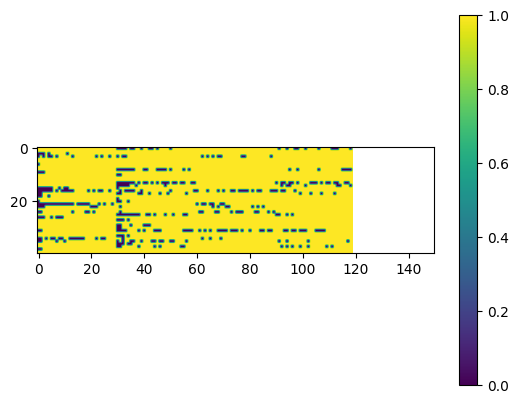

In [7]:
plt.imshow(rwdrate)
plt.colorbar()

C:\Users\sin90\AppData\Local\Temp\ipykernel_51280\3543216853.py:4: RuntimeWarning: Mean of empty slice
  plt.errorbar(np.arange(trialnum), np.nanmean(rwdrate,0)*100, 100*np.nanstd(rwdrate,0)/np.sqrt(num),fmt="go-")
C:\Users\sin90\miniconda3\lib\site-packages\numpy\lib\nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


(-5.0, 105.0)

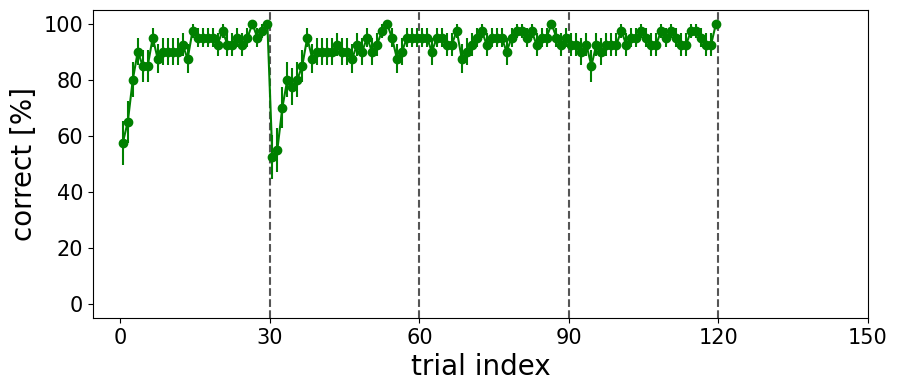

In [23]:
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [-5,105], "--",color = "#555555")
plt.errorbar(np.arange(trialnum), np.nanmean(rwdrate,0)*100, 100*np.nanstd(rwdrate,0)/np.sqrt(num),fmt="go-")
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("correct [%]", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks(fontsize = 15) 
plt.ylim([-5,105])
#plt.savefig("./figure/switch_prob_2cond_{}_Doeller_correct.png".format(hp.prob), bbox_inches = "tight")

#### For the first experience of squircle, some times new context is built because of the failuer of remembering the existing context. However, it takes some trials to build the rewarded sequence from the new context. Before it is completed, the Hopfield network successfully converged to the existing context square or circle, and existing action transition is used.

In [8]:
inflen = np.zeros((num,trialnum))*np.nan
for x in range(num):
    tmp = []
    for r in range(len(allresult[x])):
        infcond = allresult[x][r][0]["infcond"]
        preinf = allresult[x][r][0]["preinf"]
        ln = int((len(allresult[x][r][-1]["HCtrans"])-1)/2)
        if set(infcond) != set(preinf):
            for y in range(np.min([len(infcond), len(preinf)])):
                if infcond[y] == preinf[y] and ln > 1:
                    ln -= 1
                else:
                    break
        tmp.append(ln)
    #tmp = [int((len(allresult[x][r][-1]["HCtrans"])-1)/2) for r in range(len(allresult[x]))]
    inflen[x,:len(tmp)] = tmp

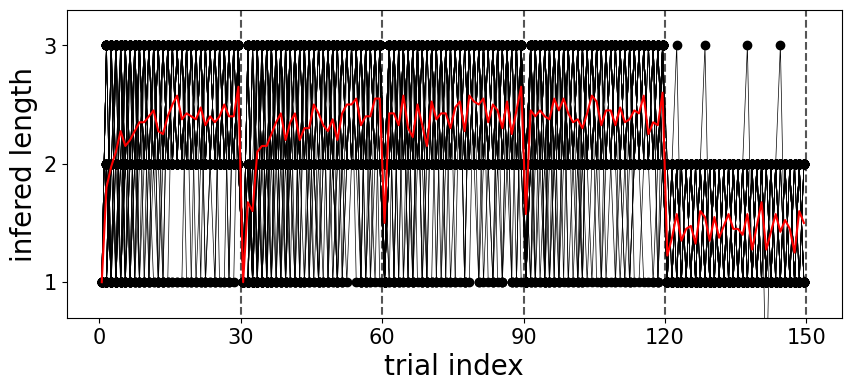

In [9]:
plt.figure(figsize = (10,4))
for i in range(1,int(trialnum/hp.swblock)+1):
    plt.plot([hp.swblock*i-0.5,hp.swblock*i-0.5], [0,5], "--",color = "#555555")
for i in range(num):
    plt.plot(np.arange(trialnum), inflen[i,:]+np.random.rand(trialnum)*0, "ko-", linewidth = 0.5)
plt.plot(np.arange(trialnum), np.nanmean(inflen,0), "r")
plt.xlabel("trial index", fontsize = 20)
plt.ylabel("infered length", fontsize = 20)
plt.xticks(np.arange(-0.5,trialnum+1,hp.swblock),np.arange(0,trialnum+1,hp.swblock), fontsize = 15)
plt.yticks([1,2,3],fontsize = 15)
plt.ylim([.7,3.3])
plt.savefig("./figure/switch_prob_2cond_{}_Doeller_inflen.png".format(hp.prob), bbox_inches = "tight")

In [76]:
choicerate2 = np.zeros((num,testnum,2))*np.nan #C2 or C3
for x in range(num):
    for r,res in enumerate(allresult[x][-30:]):
        cnd,infcond,init = res[-1]["cond"], res[0]["infcond"], np.mod(r,3)
        if 2.1 not in infcond and 2.2 not in infcond:
            infcond = res[1]["infcond"]
        if 2.1 in infcond:
            choicerate2[x,r,0] = (cnd == 4)
        elif 2.2 in infcond:
            choicerate2[x,r,1] = (cnd == 4)
        else:
            print(res)
s0rate = np.zeros((num, 10))*np.nan #which context is most likely chosen?
for r in range(num):
    for n in range(10):
        s0rate[r,n] = (choicerate2[r,3*n,0]==0 or choicerate2[r,3*n,1]==1)

In [77]:
infrate = np.zeros((num,testnum))*np.nan #C2 or C3
for x in range(num):
    for r,res in enumerate(allresult[x][-30:]):
        infcond,init = res[0]["infcond"], np.mod(r,3)
        if int(infcond[0]) != 1 and int(infcond[0]) != 6:
            infrate[x,r] = np.nan
            continue
        infrate[x,r] = 0 if infcond[0]==1 else 1 if infcond[0]==6 else 2

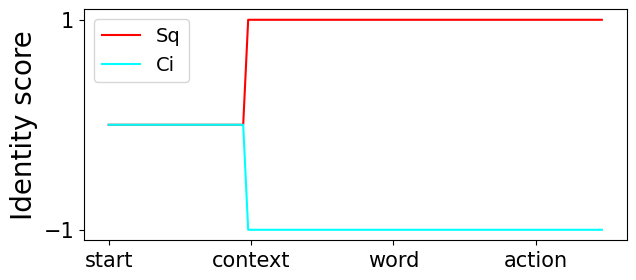

In [85]:
ln = 100
plt.figure(figsize = (7,3))
data1 = np.ones((num,ln))*np.nanmean(infrate[:,1::3] == 0, axis = 1).reshape(-1,1)
data1[:,:int(ln*2/7)] = 0
data2 = -np.ones((num,ln))*np.nanmean(infrate[:,2::3] == 1, axis = 1).reshape(-1,1)
data2[:,:int(ln*2/7)] = 0
mn1,mn2 = np.mean(data1,axis=0),np.mean(data2,axis=0)
std1,std2 = np.std(data1, axis=0)/np.sqrt(num),np.std(data1, axis=0)/np.sqrt(num)
plt.plot(np.arange(ln)/ln, mn1, color = "#ff0000", label = "Sq")
plt.fill_between(np.arange(ln)/ln,mn1-std1, mn1+std1,facecolor='#aa0000',alpha=0.5)
plt.plot(np.arange(ln)/ln, mn2, color = "#00ffff", label="Ci")
plt.fill_between(np.arange(ln)/ln,mn2-std2, mn2+std2,facecolor='#00aaaa',alpha=0.5)
plt.legend(loc="upper left", fontsize=14)
plt.xticks(np.array([0,2,4,6])/7, ["start","context","word","action"], fontsize=15)
plt.yticks([-1,1],fontsize=15)
plt.ylabel("Identity score", fontsize = 20)

plt.savefig("./figure/switch_prob_2cond_{}_Doeller_CSsqci.png".format(hp.prob), bbox_inches = "tight")

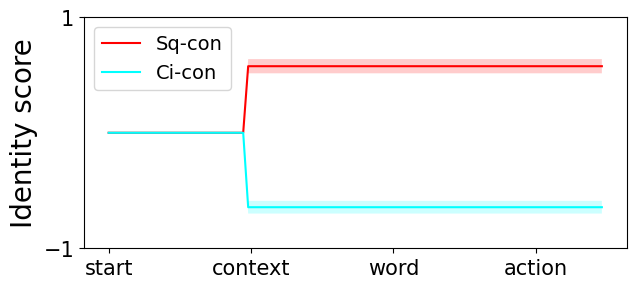

In [86]:
plt.figure(figsize = (7,3))
ln = 100
data1, data2 = np.ones((num,ln)), -np.ones((num,ln))
for i in range(num):
    data1[i,:] *= np.nanmean(infrate[i,::3][s0rate[i,:]==0] == 0)
    data2[i,:] *= np.nanmean(infrate[i,::3][s0rate[i,:]==1] == 1)
data1[:,:int(ln*2/7)] = 0
data2[:,:int(ln*2/7)] = 0

mn1,mn2 = np.mean(data1,axis=0),np.mean(data2,axis=0)
std1,std2 = np.std(data1, axis=0)/np.sqrt(num),np.std(data2, axis=0)/np.sqrt(num)
plt.plot(np.arange(ln)/ln, mn1, color = "#ff0000", label="Sq-con")
plt.fill_between(np.arange(ln)/ln,mn1-std1, mn1+std1,facecolor='#ff0000',alpha=0.2)
plt.plot(np.arange(ln)/ln, mn2, color = "#00ffff", label="Ci-con")
plt.fill_between(np.arange(ln)/ln,mn2-std2, mn2+std2,facecolor='#00ffff',alpha=0.2)
plt.legend(loc="upper left", fontsize=14)
plt.xticks(np.array([0,2,4,6])/7, ["start","context","word","action"], fontsize=15)
plt.yticks([-1,1],fontsize=15)
plt.ylabel("Identity score", fontsize = 20)
plt.savefig("./figure/switch_prob_2cond_{}_Doeller_CSsc.png".format(hp.prob), bbox_inches = "tight")

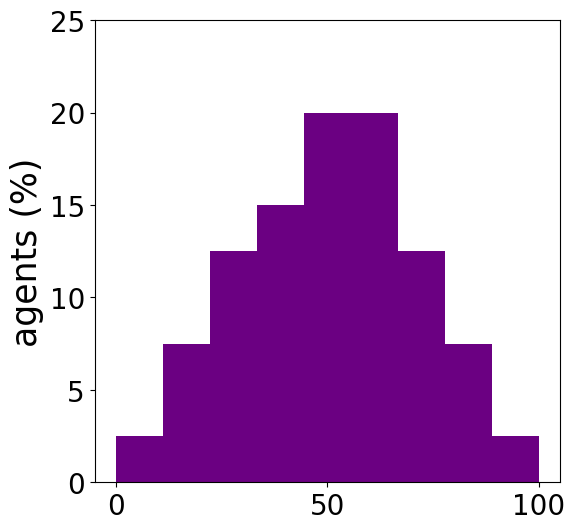

In [87]:
plt.figure(figsize = (6,6))
counts, bins = np.histogram(np.sum(s0rate == 1, axis = 1), bins = 9, range = (0,10))
plt.hist(bins[:-1], bins, weights=100*counts/np.sum(counts), facecolor = "#6b0082")
#plt.plot(np.array([1,1])*np.mean(np.sum(s0rate == 1, axis = 1)), [0,30], "--",color="#aaaaaa")
#plt.xlabel("Trials circle-consistent (%)", fontsize = 25)
plt.ylabel("agents (%)", fontsize = 25)
plt.xticks(np.array([0,5,10]),np.array([0,50,100]),fontsize = 20) 
plt.yticks(fontsize = 20)
plt.ylim([0,25])
plt.savefig("./figure/switch_prob_2cond_{}_Doeller_hist.png".format(hp.prob), bbox_inches = "tight")

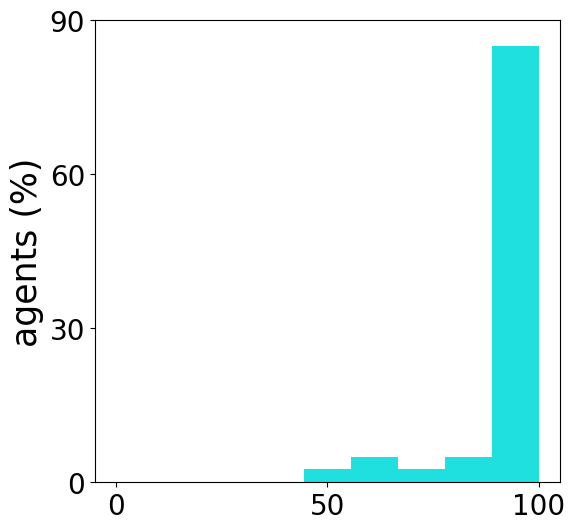

In [88]:
s0rate = np.zeros((num, 10))*np.nan
for r in range(num):
    for n in range(10):
        s0rate[r,n] = choicerate2[r,3*n+1,0]==1 or choicerate2[r,3*n+1,1]==0
        
plt.figure(figsize = (6,6))
counts, bins = np.histogram(np.sum(s0rate == 1, axis = 1), bins = 9, range = (0,10))
plt.hist(bins[:-1], bins, weights=100*counts/np.sum(counts), facecolor = "#20dfdf")
#plt.plot(np.array([1,1])*np.mean(np.sum(s0rate == 1, axis = 1)), [0,75], "--",color="#aaaaaa")
plt.ylabel("agents (%)", fontsize = 25)
plt.xticks(np.array([0,5,10]),np.array([0,50,100]),fontsize = 20) 
plt.yticks(np.arange(0,91,30),fontsize = 20)
plt.ylim([0,90])
plt.savefig("./figure/switch_prob_2cond_{}_Doeller_circlehist.png".format(hp.prob), bbox_inches = "tight")

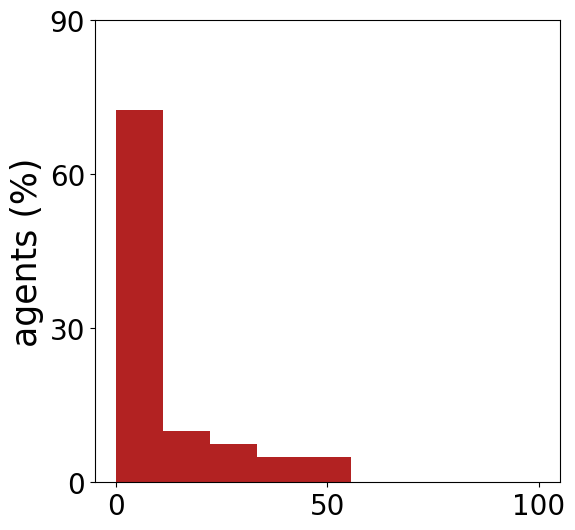

In [89]:
s0rate = np.zeros((num, 10))*np.nan
for r in range(num):
    for n in range(10):
        s0rate[r,n] = choicerate2[r,3*n+2,0]==1 or choicerate2[r,3*n+2,1]==0
        
plt.figure(figsize = (6,6))
counts, bins = np.histogram(np.sum(s0rate == 1, axis = 1), bins = 9, range = (0,10))
plt.hist(bins[:-1], bins, weights=100*counts/np.sum(counts), facecolor = "#b22222")
#plt.plot(np.array([1,1])*np.mean(np.sum(s0rate == 1, axis = 1)), [0,75], "--",color="#aaaaaa")
#plt.xlabel("Trials circle-consistent (%)", fontsize = 20)
plt.ylabel("agents (%)", fontsize = 25)
plt.xticks(np.array([0,5,10]),np.array([0,50,100]),fontsize = 20) 
plt.yticks(np.arange(0,91,30),fontsize = 20)
plt.ylim([0,90])
plt.savefig("./figure/switch_prob_2cond_{}_Doeller_squarehist.png".format(hp.prob), bbox_inches = "tight")